## Module 7 Project: datafun-07-ml

Title: Use Supervised Machine learning to create a linear regression model for a data set and then use that model to make predictions. 

Anjana Dhakal, 06/10/2024

## Import Dependencies 

In [51]:
#Import Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1: Chart a Straight Line

### 1. Define variable 'c' as a lambda function that converts fahrenheit to celsius. Then, store each Fahrenheit/Celsius pair as a tuple in temps

In [52]:
c = lambda f: 5/9 * (f-32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

### 2. Display the linear relationship between the Fahrenheit and Celsius temperatures.

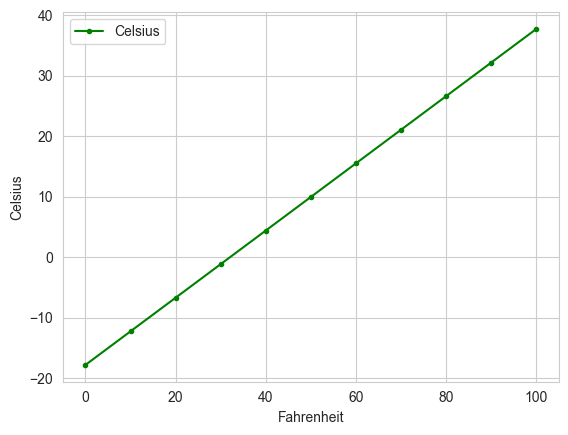

In [53]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x = 'Fahrenheit', y = 'Celsius', style = '.-', color='green')
y_label = axes.set_ylabel('Celsius')

## Part 2: Predict Avg High Temp in NYC in January

### 1. Data Acquisition

In [54]:
nyc = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')

### 2. Data Inspection

In [55]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [56]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### 3. Data Cleaning

In [57]:
#rename the 'Value' column as 'Temperature'
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [58]:
# remove the month(January) from all dates
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### 4. Descriptive Statistics

In [59]:
# set precision for descriptive statistics
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### 5. Build the Model

In [60]:
#calculate the slope
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)
linear_regression.slope

0.014771361132966163

In [61]:
#calculate the intercept
linear_regression.intercept

8.694993233674289

### 6. Predict

In [62]:
#predict the average Fahrenheit temperature for January of 2019
nyc_temp_2019 = linear_regression.slope * 2019 + linear_regression.intercept
print(nyc_temp_2019)

38.51837136113297


In [63]:
#predict the average Fahrenheit temperature for January of 2024
nyc_temp_2024 = linear_regression.slope * 2024 + linear_regression.intercept
print(nyc_temp_2024)

38.5922281667978


### 7. Visualizations

Use Seaborn’s regplot function to plot each data point with the dates on the x-axis and the temperatures on the y-axis.

Text(0.5, 1.0, 'Average High Temperature in January in NYC')

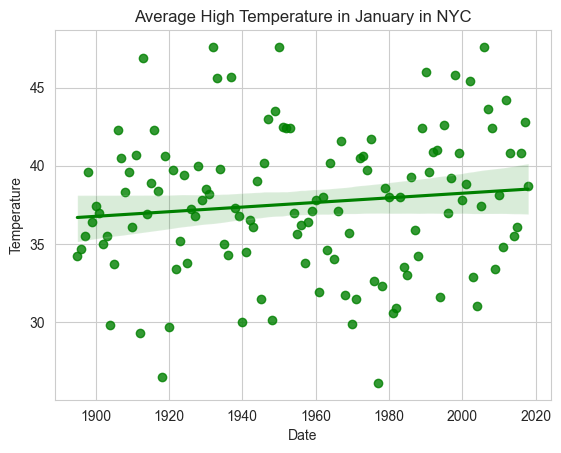

In [64]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature,  color='green')
axes.set_title('Average High Temperature in January in NYC')

 Change y axis scale to improve view of linear relationship 

Text(0.5, 1.0, 'Average High Temperature in January in NYC')

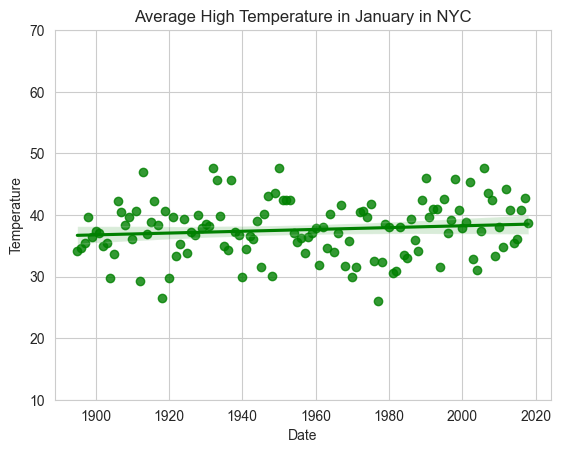

In [65]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature,  color='green')
axes.set_ylim(10, 70)
axes.set_title('Average High Temperature in January in NYC')

## Part 3: Predict Avg High Temp in NYC in January 

In [66]:
#Prep data for new analysis
df = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')

df.columns = ['Date', 'Temperature', 'Anomaly']

df.Date =df.Date.floordiv(100)

df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [67]:
df.describe() 

,Date,Temperature,Anomaly
count,124.00,124.00,124.00
mean,1956.50,37.60,0.20
std,35.94,4.54,4.54
min,1895.00,26.10,-11.30
25%,1925.75,34.58,-2.82
50%,1956.50,37.60,0.20
75%,1987.25,40.60,3.20
max,2018.00,47.60,10.20


### 1. Build the Model

In [68]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.Date.values.reshape(-1,1), df.Temperature.values,random_state = 11)

##Show shape of training 
X_train.shape

(93, 1)

In [69]:
##Show shape of testing sets
X_test.shape

(31, 1)

In [70]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

#Show the slope and intercept of the model
m = linear_regression.coef_
print(f'slope:', m)

slope: [0.01939167]


In [71]:
#Show the intercept of the model
b = linear_regression.intercept_
print(f'intercept:', b)

intercept: -0.30779820252656975


In [72]:
#View the returned coef_ and intercept_  attributes need for the line equation (y = mx + b)
print(f'The linear regression equation is y = {m}x + {b}.') 

The linear regression equation is y = [0.01939167]x + -0.30779820252656975.


### 2. Test the Model

In [73]:
predicted = linear_regression.predict(X_test)

expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### 3. Predict

Use the trained model to predict the average temperature for 2024.

In [74]:
#The expected temperature according to the model in the year 2024. 
predict = (lambda x: m * x + b)
predict(2024)

array([38.94094855])

### 4. Visualizations

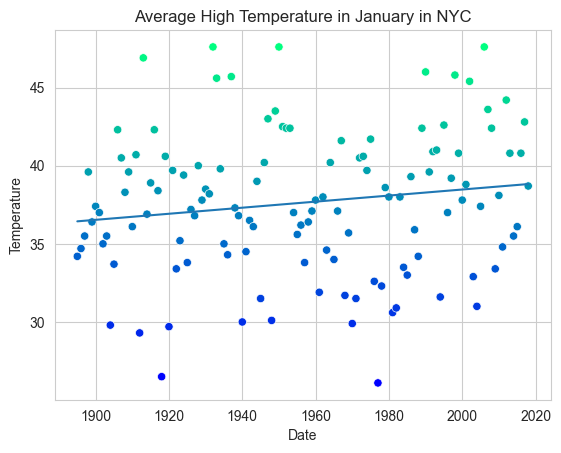

In [75]:
#Scatter plot using Seaborn
axes = sns.scatterplot(data=df, x ='Date', y='Temperature', hue='Temperature', palette = 'winter', legend =False)
x = np.array([min(df.Date.values), max(df.Date.values)])
y = predict(x)
axes.set_title('Average High Temperature in January in NYC')
line = plt.plot(x, y)

### Part 4: Add Your Insights

First approach (statistical method) uses all the datasets available to set up the model equation. The equation hence set is used to predict the values for latter year like 2019 and 2024. The second approach (Machine learning) divides data into train and test data. The model is fit with the train data and test data are used to explore how accurately the model is able to make the predictions. Both models are plotted as scatterplots using recorded data from a CSV file, each with a corresponding linear regression line. Both models appear to be very similar in their ability to predict outputs.
If we look at the values of the prediction both of the model behaved similarlt with similar scatter plot and same values of the prediction for 2019 and 2024.